In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install ggplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install Bokeh

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Line style syntax importation.
%matplotlib inline

# Structuring the code.
import math, datetime, time, random

# Accessing, extracting, manipulating and modifying your observations.
import pandas as pd
import numpy as np

# Visualisations
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import plotly
import plotly.express as px
plt.style.use("seaborn-whitegrid")

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing train and test data.

train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")
gender_submission = pd.read_csv("/content/gender_submission.csv")

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


\# 1. Cabin Feature (Predictor variable). 
> 1. Under the hood processes.
> 2. Visualisations.

In [ ]:
train.Cabin.head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [ ]:
train.Cabin.dtypes

dtype('O')

In [ ]:
train.Cabin.describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

In [ ]:
train.Cabin.value_counts().head(5)

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
Name: Cabin, dtype: int64

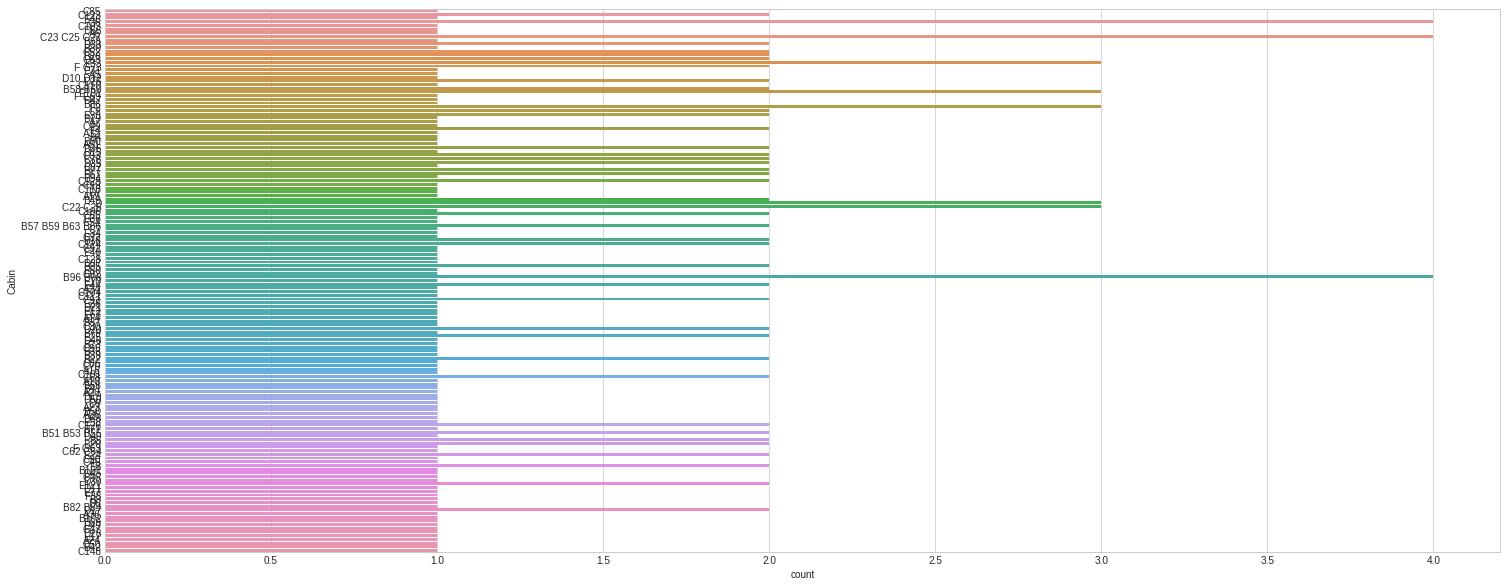

In [ ]:
fig = plt.figure(figsize=(25, 10))
sns.countplot(y='Cabin', data=train);

In [ ]:
"""CabinNull = train.Cabin.isnull()
CabinNull.head()"""

'CabinNull = train.Cabin.isnull()\nCabinNull.head()'

In [ ]:
"""CabinNullSum = CabinNull.sum()
CabinNullSum"""

'CabinNullSum = CabinNull.sum()\nCabinNullSum'

In [ ]:
"""CabinTotalLength = len(train.Cabin)
CabinTotalLength"""

'CabinTotalLength = len(train.Cabin)\nCabinTotalLength'

In [ ]:
"""CabinNullMean = (CabinNullSum / CabinTotalLength)  * 100
CabinNullMean"""

'CabinNullMean = (CabinNullSum / CabinTotalLength)  * 100\nCabinNullMean'

In [ ]:
"""train["Cabin"].fillna(CabinNullMean, inplace = True)"""

'train["Cabin"].fillna(CabinNullMean, inplace = True)'

In [ ]:
"""train.isnull().sum()"""

'train.isnull().sum()'

In [ ]:
"""msno.matrix(train)"""

'msno.matrix(train)'

**Splitting the Cabin feature into:**
> 1. Numeric = Cabin Multiple.
> 2. Letters = Cabin Adv.

In [ ]:
train.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [ ]:
train['cabin_multiple'] = train.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
train['cabin_adv'] = train.Cabin.apply(lambda x: str(x)[0])

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_multiple,cabin_adv
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,n
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,n
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,n


In [ ]:
train.cabin_multiple.head()

0    0
1    1
2    0
3    1
4    0
Name: cabin_multiple, dtype: int64

In [ ]:
train.cabin_adv.head()

0    n
1    C
2    n
3    C
4    n
Name: cabin_adv, dtype: object

In [ ]:
train.cabin_multiple.unique()

array([0, 1, 3, 2, 4])

In [ ]:
train.cabin_adv.unique()

array(['n', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [ ]:
train.cabin_multiple.dtypes

dtype('int64')

In [ ]:
train.cabin_multiple.describe()

count    891.000000
mean       0.267116
std        0.547134
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        4.000000
Name: cabin_multiple, dtype: float64

In [ ]:
train.cabin_adv.dtypes

dtype('O')

0    687
1    180
2     16
3      6
4      2
Name: cabin_multiple, dtype: int64


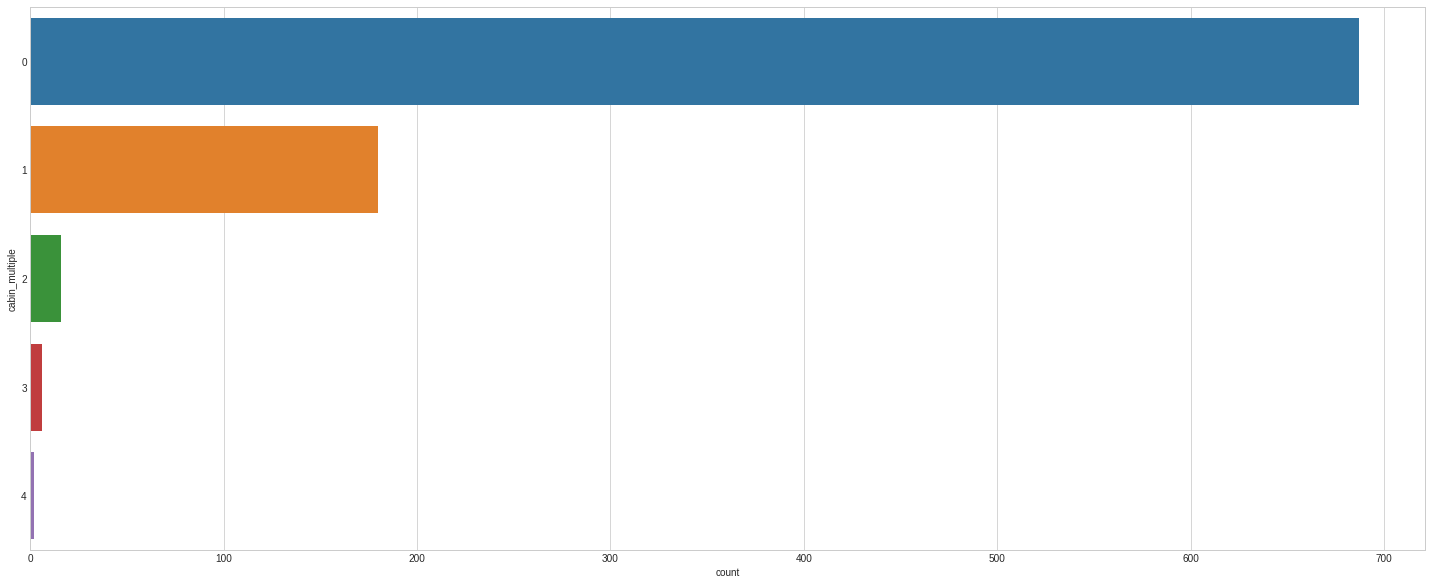

In [ ]:
fig = plt.figure(figsize=(25, 10))
sns.countplot(y='cabin_multiple', data=train);
print(train.cabin_multiple.value_counts())

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_adv, dtype: int64


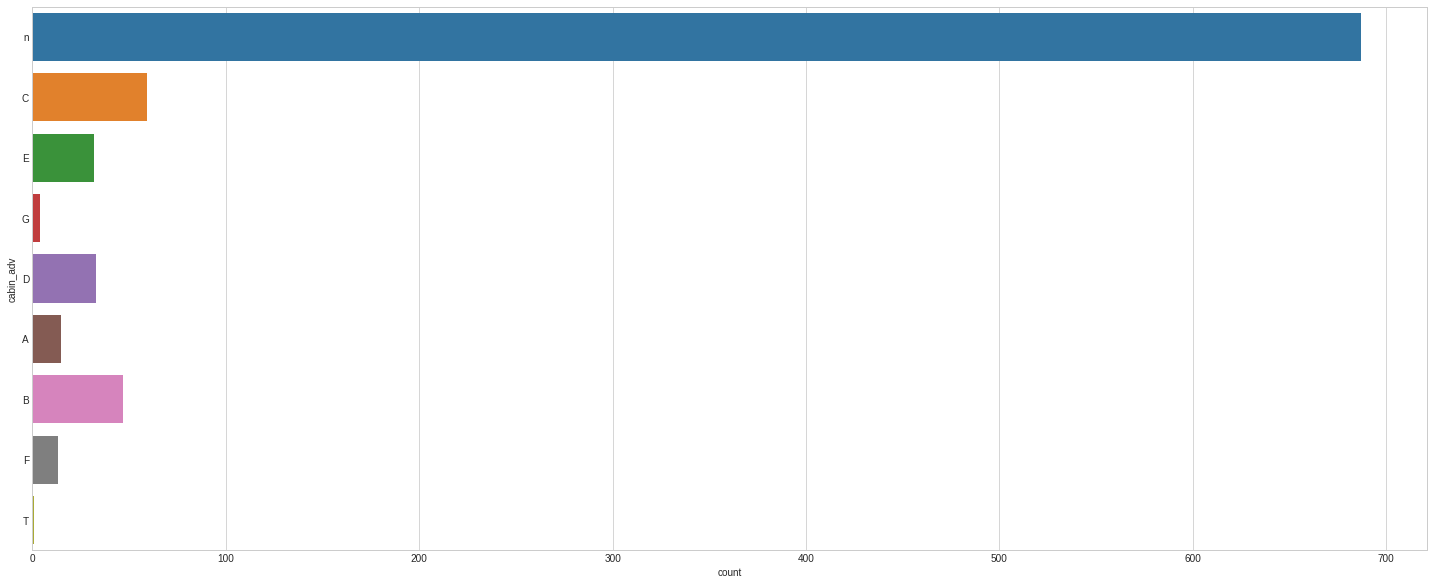

In [ ]:
fig = plt.figure(figsize=(25, 10))
sns.countplot(y='cabin_adv', data=train);
print(train.cabin_adv.value_counts())

In [ ]:
pd.pivot_table(train, index = 'Survived', columns = 'cabin_adv', values = 'Ticket', aggfunc ='count')

cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [ ]:
pd.pivot_table(train, index = 'Survived', columns = 'cabin_multiple', values = 'Ticket', aggfunc ='count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_multiple,cabin_adv
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,n
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,n
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,n
